In [111]:
# Initial imports
import pandas as pd
import alpaca_trade_api as tradeapi
from finta import TA
import numpy as np


In [146]:
# API credentials
ALPACA_API_KEY = 'PKETI0Q5C8PPUXVNHJFJ'
ALPACA_SECRET_KEY = 'WQxmEpBCoMXydCCg0G8cUe6hGLpgaAfrvedZ09Fy'
ALPACA_API_BASE_URL = "https://paper-api.alpaca.markets"

# Create a connection to the API 
api = tradeapi.REST(ALPACA_API_KEY, ALPACA_SECRET_KEY, ALPACA_API_BASE_URL, api_version="v2")

# Set signal variable
signal = 1

# Create buy signal, num shares and ticker
if signal == 1:
    orderSide = "buy"
else:
    orderSide = "sell"
    
# Set the ticket symbol and the number of shares to buy
ticker = "META"
number_of_shares = 1

# Make API call
prices = api.get_bars(ticker, "5Min", "2022-08-22", "2022-10-14", adjustment='raw').df

# create a seperate dataframe for signals
signals_df = prices
signals_df.head()

open    high     low   close  volume  \
timestamp                                                           
2022-08-22 05:05:00+00:00  167.00  167.00  167.00  167.00     150   
2022-08-22 08:00:00+00:00  166.67  166.67  165.30  165.30    5352   
2022-08-22 08:05:00+00:00  165.52  165.90  165.44  165.76    2384   
2022-08-22 08:10:00+00:00  165.64  165.64  165.33  165.33    3416   
2022-08-22 08:15:00+00:00  165.30  165.30  165.30  165.30     472   

                           trade_count        vwap  
timestamp                                           
2022-08-22 05:05:00+00:00            1  167.000000  
2022-08-22 08:00:00+00:00          192  165.939097  
2022-08-22 08:05:00+00:00           57  165.609534  
2022-08-22 08:10:00+00:00          102  165.479877  
2022-08-22 08:15:00+00:00           21  165.274470

<AxesSubplot:xlabel='timestamp'>

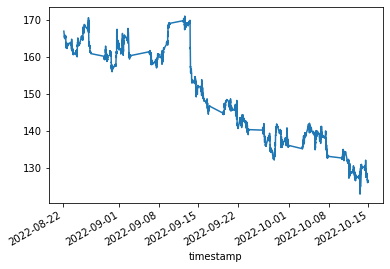

In [147]:
signals_df['close'].plot()

In [148]:
# Set the ticket symbol and the number of shares to buy
macro_ticker = "SPY"


# Make API call
macro_df = api.get_bars(macro_ticker, "5Min", "2022-08-22", "2022-10-14", adjustment='raw').df


macro_df.head()

open    high     low   close  volume  \
timestamp                                                           
2022-08-22 04:00:00+00:00  421.13  421.13  421.13  421.13   58000   
2022-08-22 04:25:00+00:00  420.81  420.81  420.81  420.81     142   
2022-08-22 05:50:00+00:00  420.40  420.40  420.40  420.40     208   
2022-08-22 06:05:00+00:00  420.25  420.25  420.18  420.18     672   
2022-08-22 06:20:00+00:00  420.40  420.40  420.40  420.40     493   

                           trade_count        vwap  
timestamp                                           
2022-08-22 04:00:00+00:00            1  421.130000  
2022-08-22 04:25:00+00:00            3  420.792606  
2022-08-22 05:50:00+00:00            3  420.400000  
2022-08-22 06:05:00+00:00           16  420.238051  
2022-08-22 06:20:00+00:00            4  420.400000

<AxesSubplot:xlabel='timestamp'>

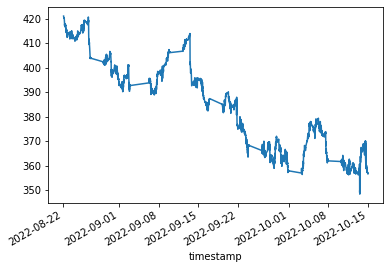

In [138]:
macro_df['close'].plot()

In [149]:
#  Setup EMAs for crosses
signals_df["9EMA"] = TA.EMA(signals_df, 9)
signals_df["20EMA"] = TA.EMA(signals_df, 20)
signals_df["50EMA"] = TA.EMA(signals_df, 50)
signals_df["200SMA"] = TA.SMA(signals_df, 200)

# Setup Indicators
signals_df["ATR"] = TA.ATR(signals_df)
bbands_df = TA.BBANDS(signals_df)
macd_df = TA.MACD(signals_df)
signals_df["RSI"] = TA.RSI(signals_df)

# join macd and bbands Dataframes to signals_df
bbands_df = pd.concat([bbands_df, macd_df], axis=1)
signals_df = pd.concat([signals_df, bbands_df], axis=1)
signals_df.drop(columns=["SIGNAL", "BB_MIDDLE"], inplace=True)
signals_df

# Review DataFrame
signals_df.head()

open    high     low   close  volume  \
timestamp                                                           
2022-08-22 05:05:00+00:00  167.00  167.00  167.00  167.00     150   
2022-08-22 08:00:00+00:00  166.67  166.67  165.30  165.30    5352   
2022-08-22 08:05:00+00:00  165.52  165.90  165.44  165.76    2384   
2022-08-22 08:10:00+00:00  165.64  165.64  165.33  165.33    3416   
2022-08-22 08:15:00+00:00  165.30  165.30  165.30  165.30     472   

                           trade_count        vwap        9EMA       20EMA  \
timestamp                                                                    
2022-08-22 05:05:00+00:00            1  167.000000  167.000000  167.000000   
2022-08-22 08:00:00+00:00          192  165.939097  166.055556  166.107500   
2022-08-22 08:05:00+00:00           57  165.609534  165.934426  165.979900   
2022-08-22 08:10:00+00:00          102  165.479877  165.729675  165.792284   
2022-08-22 08:15:00+00:00           21  165.274470  165.601856  165.673205   

                                50EMA  200SMA  ATR        RSI  BB_UPPER  \
timestamp                                                                 
2022-08-22 05:05:00+00:00  167.000000     NaN  NaN        NaN       NaN   
2022-08-22 08:00:00+00:00  166.133000     NaN  NaN   0.000000       NaN   
2022-08-22 08:05:00+00:00  166.003661     NaN  NaN  22.564821       NaN   
2022-08-22 08:10:00+00:00  165.825009     NaN  NaN  18.387876       NaN   
2022-08-22 08:15:00+00:00  165.711442     NaN  NaN  18.135646       NaN   

                           BB_LOWER      MACD  
timestamp                                      
2022-08-22 05:05:00+00:00       NaN  0.000000  
2022-08-22 08:00:00+00:00       NaN -0.038141  
2022-08-22 08:05:00+00:00       NaN -0.034335  
2022-08-22 08:10:00+00:00       NaN -0.047287  
2022-08-22 08:15:00+00:00       NaN -0.054523

In [150]:
#  Setup EMAs for crosses
macro_df["9EMA"] = TA.EMA(macro_df, 9)
macro_df["20EMA"] = TA.EMA(macro_df, 20)
macro_df["50EMA"] = TA.EMA(macro_df, 50)
macro_df["200SMA"] = TA.SMA(macro_df, 200)

# Setup Indicators
macro_df["ATR"] = TA.ATR(macro_df)
macro_bbands_df = TA.BBANDS(macro_df)
macro_macd_df = TA.MACD(macro_df)
macro_df["RSI"] = TA.RSI(macro_df)

# join macd and bbands Dataframes to macro_df
macro_bbands_df = pd.concat([macro_bbands_df, macro_macd_df], axis=1)
macro_df = pd.concat([macro_df, macro_bbands_df], axis=1)
macro_df.drop(columns=["SIGNAL", "BB_MIDDLE"], inplace=True)
macro_df

# Review DataFrame
macro_df.head()

open    high     low   close  volume  \
timestamp                                                           
2022-08-22 04:00:00+00:00  421.13  421.13  421.13  421.13   58000   
2022-08-22 04:25:00+00:00  420.81  420.81  420.81  420.81     142   
2022-08-22 05:50:00+00:00  420.40  420.40  420.40  420.40     208   
2022-08-22 06:05:00+00:00  420.25  420.25  420.18  420.18     672   
2022-08-22 06:20:00+00:00  420.40  420.40  420.40  420.40     493   

                           trade_count        vwap        9EMA       20EMA  \
timestamp                                                                    
2022-08-22 04:00:00+00:00            1  421.130000  421.130000  421.130000   
2022-08-22 04:25:00+00:00            3  420.792606  420.952222  420.962000   
2022-08-22 05:50:00+00:00            3  420.400000  420.725902  420.755637   
2022-08-22 06:05:00+00:00           16  420.238051  420.540976  420.589459   
2022-08-22 06:20:00+00:00            4  420.400000  420.499039  420.543631   

                                50EMA  200SMA  ATR        RSI  BB_UPPER  \
timestamp                                                                 
2022-08-22 04:00:00+00:00  421.130000     NaN  NaN        NaN       NaN   
2022-08-22 04:25:00+00:00  420.966800     NaN  NaN   0.000000       NaN   
2022-08-22 05:50:00+00:00  420.770260     NaN  NaN   0.000000       NaN   
2022-08-22 06:05:00+00:00  420.613725     NaN  NaN   0.000000       NaN   
2022-08-22 06:20:00+00:00  420.567494     NaN  NaN  21.276266       NaN   

                           BB_LOWER      MACD  
timestamp                                      
2022-08-22 04:00:00+00:00       NaN  0.000000  
2022-08-22 04:25:00+00:00       NaN -0.007179  
2022-08-22 05:50:00+00:00       NaN -0.021862  
2022-08-22 06:05:00+00:00       NaN -0.035947  
2022-08-22 06:20:00+00:00       NaN -0.034090

In [151]:
# here we create the exit column, our "y", for use in supervised ML
# How many rows are in the signals_df? for use in modifying DataFrame
macro_periods = macro_df.shape[0]
# Exit is the labeled target for ML, Exit Price is for use in Pnl Metrics
macro_df["Exit"] = 0
macro_df["Exit Price"] = 0


# we also figure out our exit price
# target price signaling a win will be 1
# stop price signaling a loss will be -1
# loop thru the dataframe, from row 200 to the end (periods)
for mj in range(200, macro_periods):
    # entries will be on candle close
    macro_entry = macro_df["close"].iloc[mj]
    # calculate volatility for each candle
    macro_atr = macro_df["ATR"].iloc[mj]
    # stop is entry price minus the average volatility for the entry period
    macro_target = macro_entry + (macro_atr * 3)
    # target is entry price plus the average volatility for the entry period times a multiplier
    macro_stop = macro_entry - (macro_atr)
    # loop again thru the dataset to compare j entry price to future closing prices to see if we hit target or stop
    for mk in range(mj + 1, macro_periods):
        # current low of the candle
        macro_curr_low = macro_df["low"].iloc[mk]
        # current high of the candle
        macro_curr_high = macro_df["high"].iloc[mk]
        # record and break if we hit stop or target, if not we check the next k period
        # if current low breaks our stop we should've sold: -1 in our "Exit" column
        if macro_curr_low <= macro_stop:
            macro_df["Exit Price"].iloc[mj] = macro_stop
            macro_df["Exit"].iloc[mj] = -1
            # if we hit the stop break the inner loop to check the next row
            break
        # if current high breaks our target we should've sold: +1 in our "Exit" column
        elif macro_curr_high >= macro_target:
            macro_df["Exit Price"].iloc[mj] = macro_target
            macro_df["Exit"].iloc[mj] = 1
            # if we hit the target break the inner loop to check the next row
            break

# drop beginning columns to avoid NaN values from EMA/SMA calculations
macro_df = macro_df[200:]

macro_df.head(100)

C:\Users\tjfoo\anaconda3\envs\dev\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


open      high       low     close   volume  \
timestamp                                                                    
2022-08-22 23:35:00+00:00  414.2199  414.3000  414.2000  414.2100     4620   
2022-08-22 23:40:00+00:00  414.2300  414.2500  414.2200  414.2200     2832   
2022-08-22 23:45:00+00:00  414.2300  414.3000  414.2300  414.3000    11839   
2022-08-22 23:50:00+00:00  414.2800  414.3900  414.2300  414.3900     2997   
2022-08-22 23:55:00+00:00  414.4000  414.4800  414.3800  414.3900    17777   
2022-08-23 05:15:00+00:00  413.1900  413.1900  412.7600  412.7600     4256   
2022-08-23 05:30:00+00:00  413.0000  413.0000  413.0000  413.0000     1000   
2022-08-23 06:15:00+00:00  412.1900  412.1900  412.1900  412.1900      100   
2022-08-23 06:20:00+00:00  412.1100  412.1100  412.1100  412.1100      500   
2022-08-23 06:30:00+00:00  412.0000  412.0000  412.0000  412.0000      105   
2022-08-23 06:35:00+00:00  411.7500  411.7500  411.7500  411.7500      240   
2022-08-23 07:15:00+00:00  412.5700  412.5700  412.5700  412.5700      100   
2022-08-23 07:25:00+00:00  413.5000  413.5000  413.5000  413.5000     1005   
2022-08-23 07:45:00+00:00  413.9300  413.9300  413.9300  413.9300      505   
2022-08-23 08:00:00+00:00  414.1800  414.5000  414.1500  414.4000    12519   
2022-08-23 08:05:00+00:00  414.3300  414.6600  414.2600  414.5900    15662   
2022-08-23 08:10:00+00:00  414.6000  414.8800  414.5900  414.6100     3242   
2022-08-23 08:15:00+00:00  414.6600  414.7800  414.6000  414.7800     9862   
2022-08-23 08:20:00+00:00  414.6700  414.7100  414.4800  414.5300     5411   
2022-08-23 08:25:00+00:00  414.6200  414.6300  414.5100  414.5100     2485   
2022-08-23 08:30:00+00:00  414.3000  414.3000  414.2800  414.2800     2719   
2022-08-23 08:35:00+00:00  414.4500  414.4500  414.4500  414.4500     3002   
2022-08-23 08:40:00+00:00  414.6300  414.6600  414.5500  414.5500     6171   
2022-08-23 08:45:00+00:00  414.3500  414.3500  414.2800  414.3300     1569   
2022-08-23 08:50:00+00:00  414.2400  414.3000  414.2400  414.2800     1106   
2022-08-23 08:55:00+00:00  414.2800  414.2800  414.0800  414.0800     2496   
2022-08-23 09:00:00+00:00  414.1100  414.1100  413.9800  414.0400     2430   
2022-08-23 09:05:00+00:00  414.2000  414.3500  414.1000  414.3500     1559   
2022-08-23 09:10:00+00:00  414.2800  414.2900  414.2000  414.2000     5676   
2022-08-23 09:15:00+00:00  414.1800  414.1800  414.0100  414.0100     1824   
2022-08-23 09:20:00+00:00  414.0300  414.0800  414.0100  414.0100    53296   
2022-08-23 09:25:00+00:00  413.9700  413.9800  413.8700  413.8700     2660   
2022-08-23 09:30:00+00:00  413.9300  413.9500  413.9300  413.9500      300   
2022-08-23 09:35:00+00:00  413.8400  413.8400  413.6800  413.6800    11432   
2022-08-23 09:40:00+00:00  413.7800  413.7800  413.7700  413.7700      571   
2022-08-23 09:45:00+00:00  414.0500  414.3500  414.0500  414.3500     7693   
2022-08-23 09:50:00+00:00  414.4600  414.4600  414.4000  414.4000     2181   
2022-08-23 09:55:00+00:00  414.4400  414.5204  414.4400  414.5204      963   
2022-08-23 10:00:00+00:00  414.3900  414.3900  414.3800  414.3900     1561   
2022-08-23 10:05:00+00:00  414.3800  414.3800  414.0800  414.0800     1223   
2022-08-23 10:10:00+00:00  414.0900  414.1000  414.0300  414.0300     7662   
2022-08-23 10:15:00+00:00  413.9800  413.9800  413.9500  413.9500      426   
2022-08-23 10:20:00+00:00  413.7100  413.7100  413.5700  413.5700     2562   
2022-08-23 10:25:00+00:00  413.5500  413.5600  413.4900  413.5000     6762   
2022-08-23 10:30:00+00:00  413.5600  413.6900  413.5100  413.5100     6328   
2022-08-23 10:35:00+00:00  413.5400  413.7000  413.5000  413.7000    22315   
2022-08-23 10:40:00+00:00  413.7000  414.2500  413.7000  414.2300    37784   
2022-08-23 10:45:00+00:00  414.2000  414.2900  414.2000  414.2900      402   
2022-08-23 10:50:00+00:00  414.0500  414.0500  413.8900  414.0000     3166   
2022-08-23 10:55:00+00:00  414.0300  414.1000  413.84

In [152]:

#lookup = str(signals_df.index[j])
#macro_df.index.get_loc(lookup)
#macro_df['Exit'].iloc[macro_df.index.get_loc(lookup)]

In [166]:
# here we create the exit column, our "y", for use in supervised ML
# How many rows are in the signals_df? for use in modifying DataFrame
periods = signals_df.shape[0]
# Exit is the labeled target for ML, Exit Price is for use in Pnl Metrics
signals_df["Exit Long"] = 0
signals_df["Exit Price Long"] = 0

# Exit is the labeled target for ML, Exit Price is for use in Pnl Metrics
signals_df["Exit Short"] = 0
signals_df["Exit Price Short"] = 0

# we also figure out our exit price
# target price signaling a win will be 1
# stop price signaling a loss will be -1
# loop thru the dataframe, from row 200 to the end (periods)
for j in range(200, periods):
    # entries will be on candle close
    entry = signals_df["close"].iloc[j]
    # calculate volatility for each candle
    atr = signals_df["ATR"].iloc[j]
    # stop is entry price minus the average volatility for the entry period
    stop = entry - (atr)
    short_stop = entry + (atr)
    # target is entry price plus the average volatility for the entry period times a multiplier
    target = entry + (atr * 3)
    short_target = entry - (atr * 3)
    # loop again thru the dataset to compare j entry price to future closing prices to see if we hit target or stop
    for k in range(j + 1, periods):        
        # current low of the candle
        curr_low = signals_df["low"].iloc[k]
        # current high of the candle
        curr_high = signals_df["high"].iloc[k]
        lookup = str(signals_df.index[j - 1])
        # record and break if we hit stop or target, if not we check the next k period
        # if current low breaks our stop we should've sold: -1 in our "Exit" column
        if lookup in macro_df.index:
            if macro_df['Exit'].iloc[macro_df.index.get_loc(lookup)] == 1:
                if curr_low <= stop:
                    signals_df["Exit Price Long"].iloc[j] = stop
                    signals_df["Exit Long"].iloc[j] = -1
                    # if we hit the stop break the inner loop to check the next row
                    break
                # if current high breaks our target we should've sold: +1 in our "Exit" column
                elif curr_high >= target:
                    signals_df["Exit Price Long"].iloc[j] = target
                    signals_df["Exit Long"].iloc[j] = 1
                    # if we hit the target break the inner loop to check the next row
                    break
            elif macro_df['Exit'].iloc[macro_df.index.get_loc(lookup)] == -1:
                if curr_low <= short_target:
                    signals_df["Exit Price Short"].iloc[j] = short_target
                    signals_df["Exit Short"].iloc[j] = 1
                    # if we hit the stop break the inner loop to check the next row
                    break
                # if current high breaks our target we should've sold: +1 in our "Exit" column
                elif curr_high >= short_stop:
                    signals_df["Exit Price Short"].iloc[j] = short_stop
                    signals_df["Exit Short"].iloc[j] = -1
                    # if we hit the target break the inner loop to check the next row
                    break
            
# drop beginning columns to avoid NaN values from EMA/SMA calculations
signals_df = signals_df[200:]

signals_df.head()


C:\Users\tjfoo\anaconda3\envs\dev\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


open      high     low   close  volume  \
timestamp                                                               
2022-08-25 16:40:00+00:00  166.7100  166.8000  166.38  166.76  115176   
2022-08-25 16:45:00+00:00  166.7600  166.8000  166.20  166.38   99093   
2022-08-25 16:50:00+00:00  166.3900  166.6699  166.39  166.60   60135   
2022-08-25 16:55:00+00:00  166.6299  166.8100  166.56  166.81   63258   
2022-08-25 17:00:00+00:00  166.8100  167.0100  166.69  166.96  120323   

                           trade_count        vwap        9EMA       20EMA  \
timestamp                                                                    
2022-08-25 16:40:00+00:00         1249  166.588638  166.762227  166.806444   
2022-08-25 16:45:00+00:00         1356  166.470936  166.685782  166.765830   
2022-08-25 16:50:00+00:00          867  166.575528  166.668626  166.750037   
2022-08-25 16:55:00+00:00          907  166.661019  166.696900  166.755748   
2022-08-25 17:00:00+00:00         1789  166.894533  166.749520  166.775200   

                                50EMA      200SMA       ATR        RSI  \
timestamp                                                                
2022-08-25 16:40:00+00:00  166.476945  164.631372  0.350436  49.813704   
2022-08-25 16:45:00+00:00  166.473143  164.652023  0.369721  42.796985   
2022-08-25 16:50:00+00:00  166.478118  164.674922  0.358286  47.415152   
2022-08-25 16:55:00+00:00  166.491133  164.698172  0.352207  51.444806   
2022-08-25 17:00:00+00:00  166.509520  164.722497  0.350064  54.147675   

                             BB_UPPER    BB_LOWER      MACD  Exit Long  \
timestamp                                                                
2022-08-25 16:40:00+00:00  167.320613  166.314887  0.006726          0   
2022-08-25 16:45:00+00:00  167.175572  166.344928 -0.025951          0   
2022-08-25 16:50:00+00:00  167.155414  166.331086 -0.033707          1   
2022-08-25 16:55:00+00:00  167.099070  166.355430 -0.022648          1   
2022-08-25 17:00:00+00:00  167.107566  166.402654 -0.001759          1   

                           Exit Price Long  Exit Short  Exit Price Short  
timestamp                                                                 
2022-08-25 16:40:00+00:00         0.000000          -1        167.110436  
2022-08-25 16:45:00+00:00         0.000000          -1        166.749721  
2022-08-25 16:50:00+00:00       167.674857           0          0.000000  
2022-08-25 16:55:00+00:00       167.866621           0          0.000000  
2022-08-25 17:00:00+00:00       168.010193           0          0.000000

In [167]:
# check if there is potentially-unwanted zeros in the dataframe
signals_df["Exit Short"].value_counts()

-1    3096
 0    1538
 1    1502
Name: Exit Short, dtype: int64

In [168]:
signals_df["Exit Long"].value_counts()

 0    4649
-1     750
 1     737
Name: Exit Long, dtype: int64

In [169]:
macro_df["Exit"].value_counts()

-1    5737
 1    1891
 0       3
Name: Exit, dtype: int64

In [183]:
# Remove all unwanted zeros from the exit column
signals_df_long = signals_df.copy()
signals_df_long = signals_df_long.loc[signals_df_long["Exit Long"] != 0]
signals_df_long["Exit Long"].value_counts()

-1    750
 1    737
Name: Exit Long, dtype: int64

In [184]:
# Remove all unwanted zeros from the exit column
signals_df_short = signals_df.copy()
signals_df_short = signals_df_short.loc[signals_df_short["Exit Short"] != 0]
signals_df_short["Exit Short"].value_counts()

-1    3096
 1    1502
Name: Exit Short, dtype: int64

In [185]:
# Remove all unwanted zeros from the exit column
macro_df = macro_df.loc[macro_df["Exit"] != 0]
macro_df["Exit"].value_counts()

-1    5737
 1    1891
Name: Exit, dtype: int64

In [187]:
# choose if you want continuous or discrete features
continuous_features = ["volume", "trade_count", "vwap", "9EMA", "20EMA", "50EMA", "200SMA", "ATR", "RSI", "BB_UPPER", "BB_LOWER", "MACD"]
X_long = signals_df_long[continuous_features]

# 1 means a buy would've produced a profit, -1 means a short would've produced a profit
y_long = signals_df_long["Exit Long"]
# X
y_long.head()

timestamp
2022-08-25 16:50:00+00:00    1
2022-08-25 16:55:00+00:00    1
2022-08-25 17:00:00+00:00    1
2022-08-25 17:05:00+00:00    1
2022-08-25 17:10:00+00:00    1
Name: Exit Long, dtype: int64

In [188]:
X_short = signals_df_short[continuous_features]

# 1 means a buy would've produced a profit, -1 means a short would've produced a profit
y_short = signals_df_short["Exit Short"]
# X
y_short.head()

timestamp
2022-08-25 16:40:00+00:00   -1
2022-08-25 16:45:00+00:00   -1
2022-08-25 17:40:00+00:00   -1
2022-08-25 17:45:00+00:00   -1
2022-08-25 17:50:00+00:00   -1
Name: Exit Short, dtype: int64

In [189]:
# Note: check if we have duplicate rows in the dataframe
signals_df_long.isnull().sum()

open                0
high                0
low                 0
close               0
volume              0
trade_count         0
vwap                0
9EMA                0
20EMA               0
50EMA               0
200SMA              0
ATR                 0
RSI                 0
BB_UPPER            0
BB_LOWER            0
MACD                0
Exit Long           0
Exit Price Long     0
Exit Short          0
Exit Price Short    0
dtype: int64

In [191]:
signals_df_short.isnull().sum()

open                0
high                0
low                 0
close               0
volume              0
trade_count         0
vwap                0
9EMA                0
20EMA               0
50EMA               0
200SMA              0
ATR                 0
RSI                 0
BB_UPPER            0
BB_LOWER            0
MACD                0
Exit Long           0
Exit Price Long     0
Exit Short          0
Exit Price Short    0
dtype: int64

In [192]:
# Import
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path

# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image


# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Import the finta Python library and the TA module
from finta import TA

In [193]:
from pandas.tseries.offsets import DateOffset

In [70]:
training_begin = str(y.index.min())
macro_training_begin = str(my.index.min())
training_begin

'2022-08-23 11:05:00+00:00'

In [71]:
training_end = str(y.index.min() + DateOffset(months=1))
macro_training_end = str(my.index.min() + DateOffset(months=1))
training_end

'2022-09-23 11:05:00+00:00'

Split the data into training and testing sets.

In [72]:
# Splitting into Train and Test sets
X_train = X.loc[training_begin: training_end]
y_train = y.loc[training_begin: training_end]

mX_train = mX.loc[macro_training_begin: macro_training_end]
my_train = my.loc[macro_training_begin: macro_training_end]
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]
# X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
# Create the StandardScaler instance
scaler = StandardScaler()


In [17]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)


In [18]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Fitting the Random Forest Model

Once data is scaled, create a random forest instance and train it with the training data (`X_train_scaled` and `y_train`), define `n_estimators=500` and `random_state=78`.

In [19]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier(random_state=1)



In [20]:
X_train_scaled

array([[-0.54828351, -0.62732483,  0.74244663, ...,  0.69512858,
         0.83086093,  0.12853921],
       [-0.57847007, -0.66846607,  0.72865423, ...,  0.69534591,
         0.82917987,  0.10567956],
       [-0.58006621, -0.67660861,  0.74504069, ...,  0.69555123,
         0.82787639,  0.08777886],
       ...,
       [-0.56969683, -0.66975174, -2.01191461, ..., -1.95470252,
        -1.91667943, -0.97802653],
       [-0.48848914, -0.4781878 , -1.97443461, ..., -1.96392494,
        -1.92138583, -0.96631585],
       [-0.55382023, -0.61875373, -1.96760895, ..., -1.9744595 ,
        -1.92087046, -0.89643872]])

In [21]:
y_train.isnull().sum()

0

In [22]:
# Fit the model
model = model.fit(X_train_scaled, y_train)


## Making Predictions Using the Random Forest Model

Validate the trained model, by predicting loan defaults using the testing data (`X_test_scaled`).

In [23]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)


## Model Evaluation

Evaluate model's results, by using `sklearn` to calculate the confusion matrix, the accuracy score and to generate the classification report.

In [24]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [25]:
# Displaying results
# print("Confusion Matrix")
# display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Accuracy Score : 0.3393763596809282
Classification Report
              precision    recall  f1-score   support

          -1       0.25      0.80      0.38       696
           1       0.73      0.18      0.29      2062

    accuracy                           0.34      2758
   macro avg       0.49      0.49      0.34      2758
weighted avg       0.61      0.34      0.32      2758



## Feature Importance

In this section, you are asked to fetch the features' importance from the random forest model and display the top 10 most important features.

In [26]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["1", "-1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())



In [27]:
# When saving the image, Path() is not used because graph.write_<file_type>() must take a string object

# Saving the tree as PDF
file_path = "transactions_tree.pdf"
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = "transactions_tree.png"
graph.write_png(file_path)


True

In [28]:
importances = model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.12993987874129778, '200SMA'),
 (0.12684430984531506, 'MACD'),
 (0.12096108812252772, '50EMA'),
 (0.12073765011273288, 'BB_LOWER'),
 (0.1022886031825405, 'RSI'),
 (0.08036190722708486, 'BB_UPPER'),
 (0.06618360009902334, 'ATR'),
 (0.06490490263792432, 'vwap'),
 (0.062362077633017356, '20EMA'),
 (0.058807041310408356, '9EMA')]

In [29]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = model.predict(X_test_scaled)

In [30]:
# Use the trained model to predict the trading signals for the training data
training_signal_predictions = model.predict(X_train_scaled)

In [31]:

SGD_training_report = classification_report(y_train,training_signal_predictions)
print(SGD_training_report)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       888
           1       1.00      1.00      1.00      2889

    accuracy                           1.00      3777
   macro avg       1.00      1.00      1.00      3777
weighted avg       1.00      1.00      1.00      3777



In [32]:
# Evaluate the model's ability to predict the trading signal for the testing data
testing_report = classification_report(y_test, testing_signal_predictions)

# Display the report
print(testing_report)

              precision    recall  f1-score   support

          -1       0.25      0.80      0.38       696
           1       0.73      0.18      0.29      2062

    accuracy                           0.34      2758
   macro avg       0.49      0.49      0.34      2758
weighted avg       0.61      0.34      0.32      2758



In [33]:
#
signals_df["actual_returns"] = (signals_df["Exit Price"] - signals_df["close"])/signals_df["close"]

C:\Users\tjfoo\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

predictions_df["predicted_signal"] = testing_signal_predictions

predictions_df["actual_returns"] = signals_df["actual_returns"]

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
predictions_df.tail()

predicted_signal  actual_returns  \
timestamp                                                     
2022-10-14 23:20:00+00:00                -1       -0.000747   
2022-10-14 23:25:00+00:00                -1       -0.000809   
2022-10-14 23:30:00+00:00                -1       -0.000826   
2022-10-14 23:40:00+00:00                -1       -0.000809   
2022-10-14 23:50:00+00:00                -1       -0.000944   

                           trading_algorithm_returns  
timestamp                                             
2022-10-14 23:20:00+00:00                   0.000747  
2022-10-14 23:25:00+00:00                   0.000809  
2022-10-14 23:30:00+00:00                   0.000826  
2022-10-14 23:40:00+00:00                   0.000809  
2022-10-14 23:50:00+00:00                   0.000944

In [35]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod()

actual_returns  trading_algorithm_returns
timestamp                                                           
2022-09-23 11:05:00+00:00        0.998238                   0.998238
2022-09-23 11:10:00+00:00        1.003986                   0.992490
2022-09-23 11:15:00+00:00        1.010025                   0.986520
2022-09-23 11:20:00+00:00        1.016065                   0.992419
2022-09-23 11:25:00+00:00        1.021936                   0.986685
...                                   ...                        ...
2022-10-14 23:20:00+00:00        0.942441                   1.484751
2022-10-14 23:25:00+00:00        0.941679                   1.485952
2022-10-14 23:30:00+00:00        0.940901                   1.487179
2022-10-14 23:40:00+00:00        0.940139                   1.488382
2022-10-14 23:50:00+00:00        0.939252                   1.489788

[2758 rows x 2 columns]

In [36]:
signals_df["ATR"].mean()

0.3776131990904715

In [37]:
predictions_df["predicted_signal"].value_counts()

-1    2240
 1     518
Name: predicted_signal, dtype: int64

In [38]:
# set the max columns to none
pd.set_option('display.max_rows', None)

<AxesSubplot:xlabel='timestamp'>

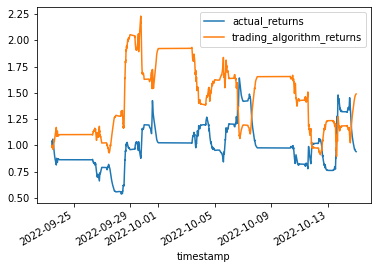

In [39]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()

In [40]:
signals_df["ATR"].std()

0.23615552265148107